# KNN分类模型转化回归模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 样本特征
data_X = [
    [1.3, 6],
    [3.5, 5],
    [4.2, 2],
    [5, 3.3],
    [2, 9],
    [5, 7.5],
    [7.2, 4 ],
    [8.1, 8],
    [9, 2.5]
]
data_y = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7]

In [3]:
X_train = np.array(data_X)
y_train = np.array(data_y)
data_new = np.array([4,5])

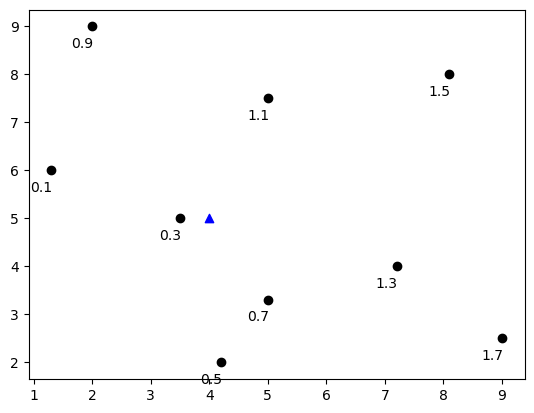

In [4]:
plt.scatter(X_train[:,0],X_train[:,1],color='black')
plt.scatter(data_new[0], data_new[1],color='b', marker='^')
for i in range(len(y_train)):
    plt.annotate(y_train[i], xy=X_train[i], xytext=(-15,-15), textcoords='offset points')

plt.show()

In [11]:
distances = [np.sqrt(np.sum((data - data_new)**2)) for data in X_train]
sort_index = np.argsort(distances)
distances,sort_index

([2.879236009777594,
  0.5,
  3.006659275674582,
  1.9723082923316022,
  4.47213595499958,
  2.692582403567252,
  3.3526109228480423,
  5.080354318352215,
  5.5901699437494745],
 array([1, 3, 5, 0, 2, 6, 4, 7, 8], dtype=int64))

In [13]:
k = 5
first_k =  [y_train[i] for i in sort_index[:k]]
first_k

[0.3, 0.7, 1.1, 0.1, 0.5]

In [15]:
from collections import Counter
Counter(first_k).most_common(1)
predict_y = Counter(first_k).most_common(1)[0][0]
predict_y

0.3

In [16]:
k = 5
first_k =  [y_train[i] for i in sort_index[:k]]
np.mean(first_k)

0.54

# KNN回归 Scikit learn 实现

In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
knn_reg = KNeighborsRegressor(n_neighbors=5)

In [11]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
predict_y = knn_reg.predict(data_new.reshape(1,-1))

In [13]:
predict_y

array([0.54])

# Boston 数据集

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

In [15]:
boston = load_boston()
x = boston.data
y = boston.target
x.shape, y.shape

((506, 13), (506,))

In [16]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
x_train ,x_test, y_train, y_test = train_test_split(x, y ,train_size = 0.7, random_state=233)

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance', p=2)

In [20]:
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(weights='distance')

In [21]:
knn_reg.score(x_test, y_test)

0.49308828546554706

# 归一化

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
standardScaler = StandardScaler()

In [24]:
standardScaler.fit(x_train)

StandardScaler()

In [25]:
x_train = standardScaler.transform(x_train)

In [26]:
x_test = standardScaler.transform(x_test)

In [27]:
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(weights='distance')

In [28]:
knn_reg.score(x_test, y_test)

0.8315777292735131